In [9]:
from numpy import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import tools

import datetime
import socket
print("Generated on %s on %s" % (datetime.date.today(), socket.gethostname()))

Generated on 2018-02-10 on lyelaptop


# Kelvin-Helmholtz

We run the Kelvin-Helmholtz instability for different resolutions

core_counts['multix'] = [1, 4, 16, 64, 256, 1024]
runtimes['multix'] = [0, 1, 2, 4, 8, 16]
runtimes_per_timestep['multix'] = [0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125]

core_counts['multiy'] = [1, 4, 16, 64, 256, 1024]
runtimes['multiy'] = [0, 1, 2, 4, 8, 16]
runtimes_per_timestep['multiy'] = [0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125]

core_counts['multixmultiy'] = [1, 4, 16, 64, 256, 1024]
runtimes['multixmultiy'] = [0, 1, 2, 4, 8, 16]
runtimes_per_timestep['multixmultiy'] = [0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125]

Git revision: d8b067b831704c6b510ef0e85382e3612497bdc6


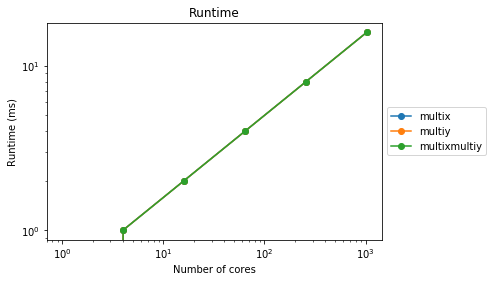

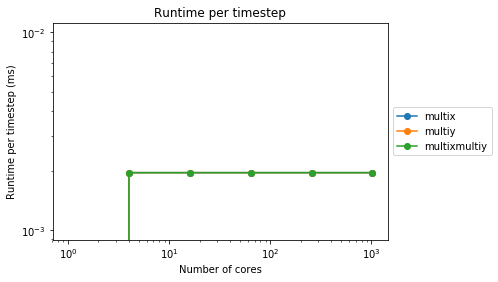

revisions= ['d8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6', 'd8b067b831704c6b510ef0e85382e3612497bdc6']

build_types: ['Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Rele

In [4]:
setups=['multix', 'multiy', 'multixmultiy']
build_types = []
revisions = []
for setup in setups:
    basename = '../runs/{setup}/2d/weak_scaling/kelvinhelmholtz_{N}/alsuqcli_kh_{N}_report.json'
    
    resolutions = [256, 512, 1024, 2048, 4096, 8192]
    runtimes = []
    runtimes_per_timestep = []
    core_counts = []
    for resolution in resolutions:
        report = basename.format(N=resolution, setup = setup)
        
        git_revision = tools.get_revision(report)
        revisions.append(git_revision)
        build_types.append(tools.get_build_type(report))
        runtime = tools.get_runtime(report)
        runtimes.append(runtime)
        
        cores = tools.get_total_cores(report)
        core_counts.append(cores)
        
        timesteps = tools.get_timesteps(report)
        runtimes_per_timestep.append(float(runtime)/timesteps)
    plt.figure(0)
    plt.title("Runtime")
    plt.loglog(core_counts, runtimes, '-o',label=setup)
    plt.xlabel('Number of cores')
    plt.ylabel('Runtime (ms)')
    ax = plt.gca()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    
    plt.figure(1)
    plt.title("Runtime per timestep")
    plt.loglog(core_counts, runtimes_per_timestep, '-o',label=setup)
    plt.xlabel('Number of cores')
    plt.ylabel('Runtime per timestep (ms)')
    
    ax = plt.gca()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    print("core_counts['%s'] = %s" % (setup, core_counts))
    print("runtimes['%s'] = %s" % (setup, runtimes))
    print("runtimes_per_timestep['%s'] = %s" % (setup, runtimes_per_timestep))
    print("")
print("Git revision: %s" % git_revision )
plt.show()
print("revisions= %s" % revisions)
print()
print("build_types: %s" % build_types)

In [5]:
import os
cmakeCache = '../alsvinn/build/CMakeCache.txt'
if os.path.exists(cmakeCache):
    with open(cmakeCache, 'r') as f:
        print(f.read())